In [1]:
# 1. setting data and visualizing the data
# 2. Univariate Linear Regression (using NumPy)
# 3. Using SCIKIT to implement Multivariate Linear Regression

In [3]:
#prediction of Interest Rate based on persond FICO (Credit Score) and Loan amounts
# CSV data taken from --> www.spark-public.s3.amazonaws/dataanalysis/loansData.csv

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline 

In [2]:
loans_data = pd.read_csv('Youtube_Notes_ML/2_loansData.csv')
loans_data.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
99592,19200,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
80059,35000,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
15825,10000,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
33182,12000,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [9]:
print(loans_data['Loan.Length'][0:10]) # shows 1st 10 data
# we can see that the data also includes the text => '36 months' and so on
# we have to remove that
loans_data['Loan.Length'][0:10]

81174    36 months
99592    36 months
80059    60 months
15825    36 months
33182    36 months
62403    36 months
48808    36 months
22090    60 months
76404    36 months
15867    36 months
Name: Loan.Length, dtype: object


81174    36 months
99592    36 months
80059    60 months
15825    36 months
33182    36 months
62403    36 months
48808    36 months
22090    60 months
76404    36 months
15867    36 months
Name: Loan.Length, dtype: object

In [10]:
loans_data['Interest.Rate'][0:10]

81174     8.90%
99592    12.12%
80059    21.98%
15825     9.99%
33182    11.71%
62403    15.31%
48808     7.90%
22090    17.14%
76404    14.33%
15867     6.91%
Name: Interest.Rate, dtype: object

In [11]:
loans_data['FICO.Range'][0:10]
# the range is not good for programming, we have to convert it into string and then to number
# OR we can pick any value between the range

81174    735-739
99592    715-719
80059    690-694
15825    695-699
33182    695-699
62403    670-674
48808    720-724
22090    705-709
76404    685-689
15867    715-719
Name: FICO.Range, dtype: object

In [14]:
# cleaned up data is available and stored in the the file
loans = pd.read_csv('Youtube_Notes_ML/loan.csv')
loans.head()

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
6,15.31,670,36,4891.67,6000
11,19.72,670,36,3575.00,2000
12,14.27,665,36,4250.00,10625
13,21.67,670,60,14166.67,28000
21,21.98,665,36,6666.67,22000


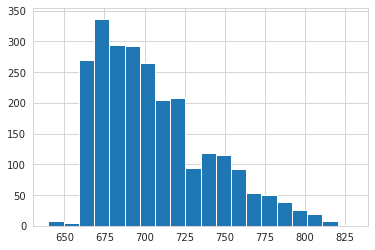

In [18]:
# Now we will try to see the distribution in the HISTOGRAM

plt.figure()
fico = loans['FICO.Score']
fico.hist(bins=20)

# the distribution is not normal distribution
# i.e. FICO is not only one responsible for borrowing

Text(0, 0.5, 'Interest Rate in %')

<Figure size 1440x1440 with 0 Axes>

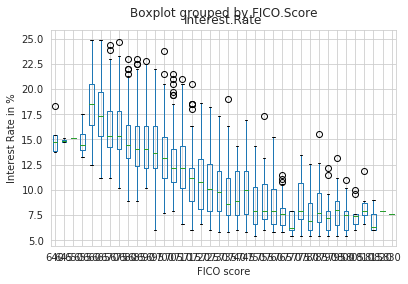

In [31]:
plt.figure(figsize=(20,20))
x = loans.boxplot('Interest.Rate','FICO.Score')

x.set_xlabel('FICO score')
x.set_ylabel('Interest Rate in %')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xa32d5eec>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

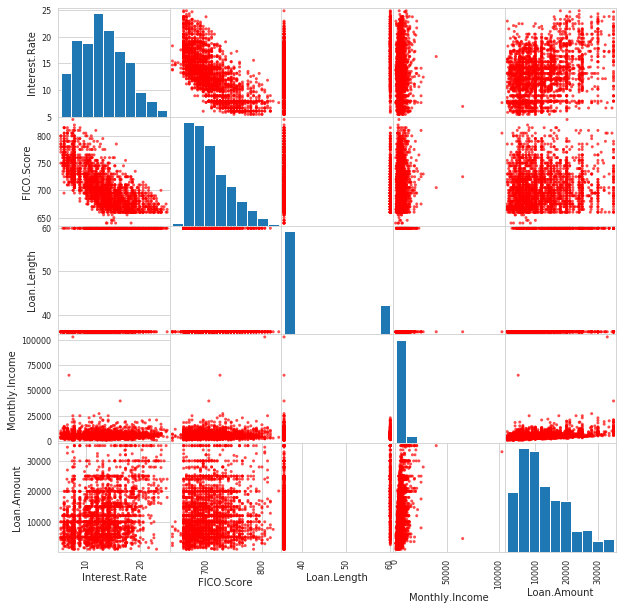

In [35]:
# Scatterplot matrix
plt.figure()
pd.plotting.scatter_matrix(loans,alpha=0.7,color='red',figsize=(10,10))

In [ ]:
# in the above figure we have to look for the linearity => interest rate vs fico and loan amount

## Analysis: Multivariate Linear Regression

In [37]:
import statsmodels.api as sm     # for statistical Analysis

In [39]:
dframe = pd.read_csv('Youtube_Notes_ML/loan.csv')
dframe.head()

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
6,15.31,670,36,4891.67,6000
11,19.72,670,36,3575.00,2000
12,14.27,665,36,4250.00,10625
13,21.67,670,60,14166.67,28000
21,21.98,665,36,6666.67,22000


In [77]:
int_rate = dframe['Interest.Rate']
loan_amt = dframe['Loan.Amount']
fico_score = dframe['FICO.Score']
print(int_rate.shape)

(2500,)


In [79]:
x1 = np.matrix(fico_score).transpose()
x2 = np.matrix(loan_amt).transpose()

y = np.matrix(int_rate).transpose()
print(y.shape, int_rate.shape)

(2500, 1) (2500,)


In [75]:
x = np.column_stack([x1,x2])
x.shape

(2500, 2)

In [85]:
# adds a column to the input data set of ones
print(x.shape)

x3 = sm.add_constant(x)
print(x3.shape)

(2500, 2)
(2500, 3)


In [86]:
# Ordinary Least Square
# takes two array and does the prediction
#OLS(response, predictor)

model = sm.OLS(y, x3)

model_fit = model.fit()

In [88]:
print('P values are = ', model_fit.pvalues)  # probability values (0 to 5%) then its very good
print('R-sqared values are = ', model_fit.rsquared ) # tells how good the regression line approximated with varied data points
# the values has to be below 5%

P values are =  [0.00000000e+000 0.00000000e+000 5.96972978e-203]
R-sqared values are =  0.6566326246493587
